In [1]:
#Simple linear regression model for Melbourne Housing Price dataset #Reference to Task2 in Internship tasks
#Importing basic necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Reading dataset
data= pd.read_csv("melbourne.csv")
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [2]:
data.shape


(23547, 21)

In [3]:
data.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
#Preprocessing and data cleaning
#checking for missing values
data.isnull().sum().sum()


66918

In [5]:
#check % of missing values
percentage_of_missing_values= round(100*data.isnull().sum()/len(data.index),2)
print(percentage_of_missing_values)


Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.88
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         19.03
Bathroom         19.04
Car              19.65
Landsize         26.06
BuildingArea     57.46
YearBuilt        50.99
CouncilArea      33.51
Lattitude        18.28
Longtitude       18.28
Regionname        0.00
Propertycount     0.00
dtype: float64


In [6]:
#removing three columns having 33-56% of missing values in dataset
data=data.drop('BuildingArea',axis=1)
data=data.drop('YearBuilt',axis=1)
data=data.drop('CouncilArea',axis=1)
data.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
#removing rows with missing value in price column
data=data[~np.isnan(data['Price'])]
#removing rows where there is null value in the landsize column
data= data[~np.isnan(data['Landsize'])]
percentage_of_missing_values= round(100*(data.isnull().sum()/len(data.index)),2)
print(percentage_of_missing_values)


Suburb           0.00
Address          0.00
Rooms            0.00
Type             0.00
Price            0.00
Method           0.00
SellerG          0.00
Date             0.00
Distance         0.00
Postcode         0.00
Bedroom2         0.00
Bathroom         0.01
Car              0.46
Landsize         0.00
Lattitude        0.16
Longtitude       0.16
Regionname       0.00
Propertycount    0.00
dtype: float64


In [8]:
#describing values for lattitude and longitude
data[['Lattitude','Longtitude']].describe()
data['Lattitude']=data['Lattitude'].fillna(data['Lattitude'].mean())
data['Longtitude'].fillna(data['Longtitude'].mean(),inplace=True)
#impute values in categorical values columns using mode function
data['Bathroom'].fillna(data['Bathroom'].mode()[0],inplace=True)
data['Car'].fillna(data['Car'].mode()[0],inplace=True)
data.isnull().sum().sum()


0

In [23]:
# Identifying object columns
print(data.select_dtypes(['object']).columns)



Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname'], dtype='object')


In [24]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG','Regionname']

for colname in obj_cats:
    data[colname] = data[colname].astype('category') 
import datetime
# Converting to date object
data['Date'] = pd.to_datetime(data['Date'])

data.shape


(13603, 18)

In [25]:
# Convert numeric variables to categorical nature
num_cats = ['Postcode']  

for colname in num_cats:
    data[colname] = data[colname].astype('category')   

# checking info
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 13603 entries, 1 to 23545
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13603 non-null  category      
 1   Address        13603 non-null  category      
 2   Rooms          13603 non-null  int64         
 3   Type           13603 non-null  category      
 4   Price          13603 non-null  float64       
 5   Method         13603 non-null  category      
 6   SellerG        13603 non-null  category      
 7   Date           13603 non-null  datetime64[ns]
 8   Distance       13603 non-null  float64       
 9   Postcode       13603 non-null  category      
 10  Bedroom2       13603 non-null  float64       
 11  Bathroom       13603 non-null  float64       
 12  Car            13603 non-null  float64       
 13  Landsize       13603 non-null  float64       
 14  Lattitude      13603 non-null  float64       
 15  Longtitude     1360

In [27]:
#Exploratory data analysis
data.describe()



,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,13603.000000,1.360300e+04,13603.000000,13603.000000,13603.000000,13603.000000,13603.000000,13603.000000,13603.000000,13603.000000
mean,2.938175,1.075338e+06,10.140469,2.914945,1.534882,1.612218,558.116371,-37.809204,144.995221,7451.025583
std,0.955986,6.389857e+05,5.871805,0.966145,0.691824,0.960377,3987.326586,0.079193,0.103829,4378.442541
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,176.500000,-37.856800,144.929750,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,-37.802500,145.000000,6543.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,-37.756500,145.058195,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,-37.408530,145.526350,21650.000000


<AxesSubplot:xlabel='Price'>

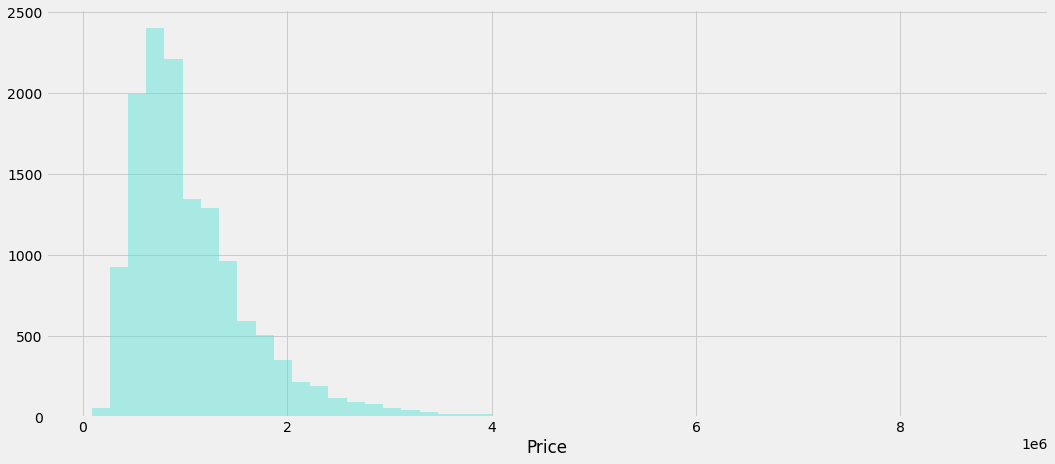

In [32]:
#Univariate feature// Price is the target variable here to be predicted.
plt.figure(figsize=(16,7))
sns.distplot(data['Price'], kde = False,color='turquoise')



c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

<AxesSubplot:xlabel='Rooms'>

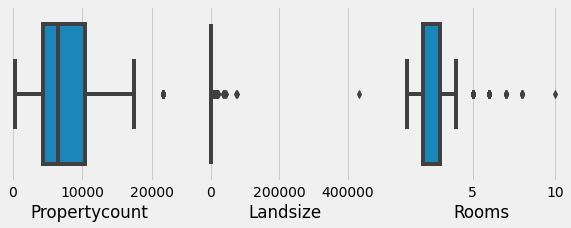

In [33]:
#checking other outliers
plt.rcParams['figure.figsize']= (12,3)
plt.style.use('fivethirtyeight')
plt.subplot(1,4,1)
sns.boxplot(data['Propertycount'])
plt.subplot(1,4,2)
sns.boxplot(data['Landsize'])
plt.subplot(1,4,3)
sns.boxplot(data['Rooms'])



<AxesSubplot:xlabel='Regionname', ylabel='Price'>

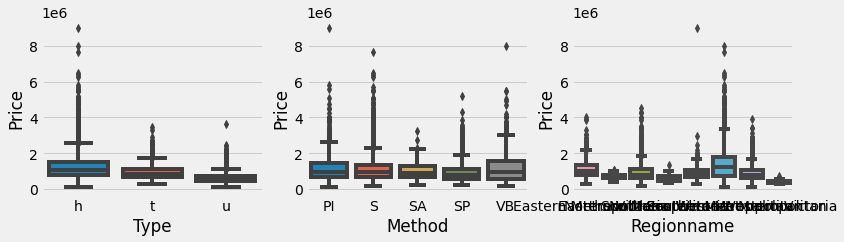

In [37]:
#Bivariate features and outliers
#Here the relation of Price with some categorical features are observed 
plt.subplot(1,3,1)
sns.boxplot(y=data['Price'],x=data['Type'])
plt.subplot(1,3,2)
sns.boxplot(y=data['Price'],x=data['Method'])
plt.subplot(1,3,3)
sns.boxplot(y=data['Price'],x=data['Regionname'])




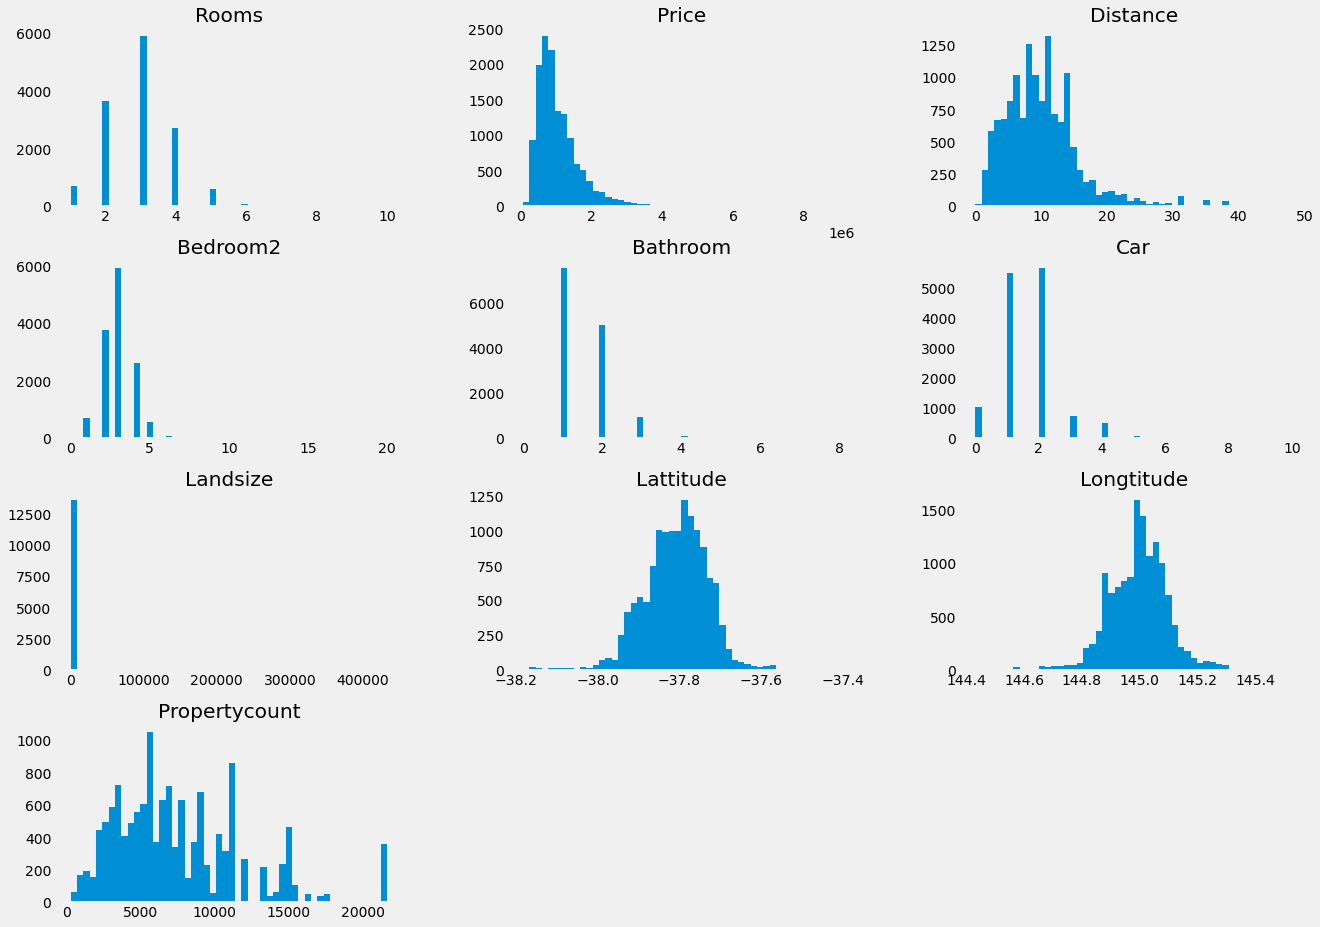

In [39]:
#Histogram
#plotting histogram of all numeric values
data.hist(bins= 50, grid= False, figsize=(20,15));


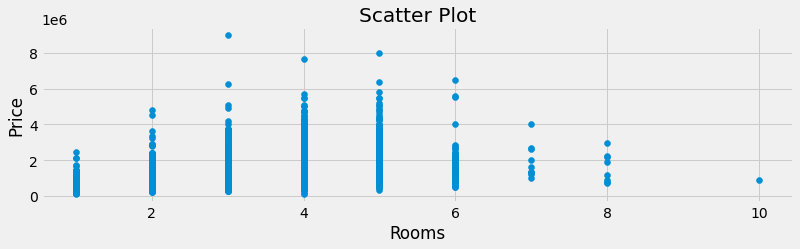

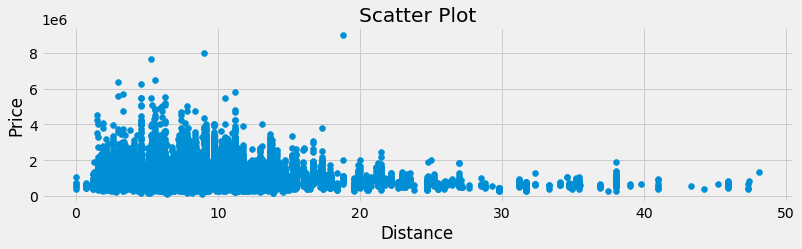

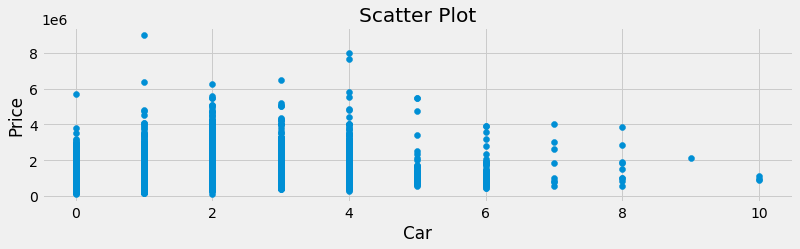

In [42]:
#Finding scatterplot
plt.scatter(data['Rooms'],data['Price'])
plt.title("Scatter Plot")
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

plt.scatter(data['Distance'],data['Price'])
plt.title("Scatter Plot")
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

plt.scatter(data['Car'],data['Price'])
plt.title("Scatter Plot")
plt.xlabel('Car')
plt.ylabel('Price')
plt.show()


<AxesSubplot:>

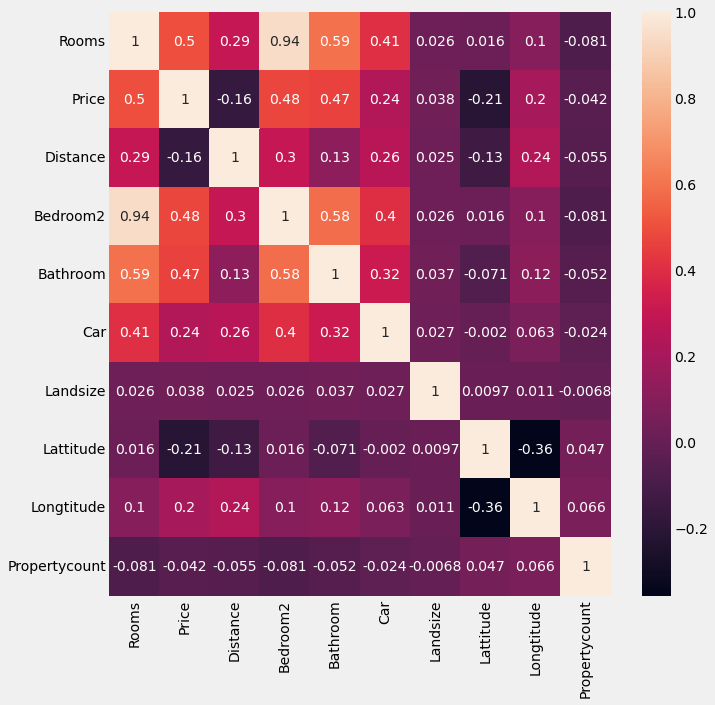

In [43]:
#Heatmap creation
fig,ax= plt.subplots(figsize=(10,10))
corr= data.corr()
sns.heatmap(corr,annot=True,ax=ax)


In [51]:
# It looks like Price has moderate positive correlation with Rooms,Bedroom2,Bathroom and low positive correlation with Car etc.
#Negative correlation exists with Distance and Longtitude
# AS WE ARE TO CREATE A SIMPLE REGRESSION MODEL , WE TAKE PRICE AS TARGET VARIABLE Y AND ROOMS AS INDEPENDENT VARIABLE X
x = data[['Rooms']]
y = data['Price']
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.17,random_state=0)

#model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


y_pred = model.predict(x_test)
#MAE, RMSE AND MSE SCORES HELP TO KNOW THE DEVIATION OF PREDICTED VALUES FROM ACTUAL VALUES
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))



MAE: 391920.1426202871
MSE: 295127447451.8998
RMSE: 543256.3367802531


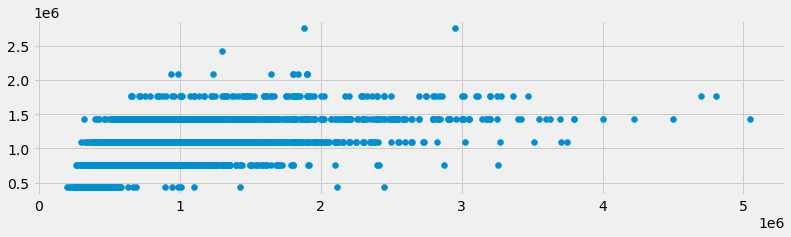

In [52]:
plt.scatter(y_test, y_pred)


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

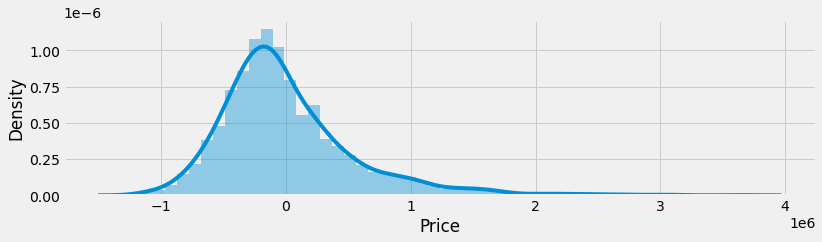

In [53]:
sns.distplot((y_test - y_pred))


In [54]:
cdf = pd.DataFrame(data = model.coef_, index = x.columns, columns = ['Coefficients'])
cdf


,Coefficients
Rooms,332580.571423


In [55]:
#model intercepts & coefficients
model.coef_


array([332580.57142288])

In [57]:
model.intercept_


97628.53845780867

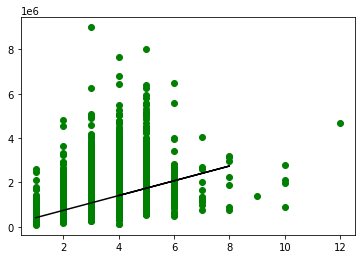

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Reading dataset
data= pd.read_csv("melbourne.csv")

data= data[~np.isnan(data['Rooms'])]
data= data[~np.isnan(data['Price'])]

x = data[['Rooms']]
y = data['Price']
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.17,random_state=0)

#model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
# Plotting the Regression line
plt.scatter(x_train, y_train,color='g')
plt.plot(x_test, y_pred,color='k')
